In [82]:
'''
파일명 : Ex01.ipynb
설명 : 당뇨병 데이터셋을 활용한 다중 선형 회귀
작성자 : 김영민
최초작성일 : 2024-11-04
최종수정일 : 2024-11-04
github : https://github.com/ggumtakg/AIFFEL_quest_rs/tree/main/Exploration/Ex01
'''
from IPython.display import display, Image
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

In [83]:
diabetes = load_diabetes()#데이터셋 불러오기

df_X = diabetes.data#입력데이터
df_Y = diabetes.target#타겟데이터

print(df_X.shape)
print(df_Y.shape)

(442, 10)
(442,)


In [84]:
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=20)#8:2비율로 train_test_split

print(df_X_train.shape, df_Y_train.shape)
print(df_X_test.shape, df_Y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [85]:
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')#데이터셋 구조파악

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [86]:
print(df_X[0])
print()
print(df_Y[0])

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

151.0


In [87]:
def model(x, w, b):#모델함수 구현
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * w[i]
    predictions += b
    return predictions

In [88]:
def MSE(a, b):#MSE
    mse = ((a - b) ** 2).mean()
    return mse

def loss(x, w, b, y):#loss
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [89]:
def gradient(x, w, b, y):#gradient
    #데이터 포인트의 개수
    N = len(y)
    
    y_pred = model(x, w, b)
    
    # w gradient 계산
    dw = 1 / N * 2 * x.T.dot(y_pred - y)
        
    # b gradient 계산
    db = 2 * (y_pred - y).mean()
    return dw, db

In [90]:
LEARNING_RATE = 0.001#학습률

w_rand = np.random.rand(10)
b_rand = np.random.rand()

w = w_rand
b = b_rand

In [91]:
losses = []

for i in range(1, 1001):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28723.3333
Iteration 20 : Loss 27825.9271
Iteration 30 : Loss 26963.7133
Iteration 40 : Loss 26135.3108
Iteration 50 : Loss 25339.3924
Iteration 60 : Loss 24574.6833
Iteration 70 : Loss 23839.9585
Iteration 80 : Loss 23134.0410
Iteration 90 : Loss 22455.8004
Iteration 100 : Loss 21804.1502
Iteration 110 : Loss 21178.0468
Iteration 120 : Loss 20576.4876
Iteration 130 : Loss 19998.5092
Iteration 140 : Loss 19443.1860
Iteration 150 : Loss 18909.6289
Iteration 160 : Loss 18396.9837
Iteration 170 : Loss 17904.4294
Iteration 180 : Loss 17431.1776
Iteration 190 : Loss 16976.4707
Iteration 200 : Loss 16539.5808
Iteration 210 : Loss 16119.8085
Iteration 220 : Loss 15716.4822
Iteration 230 : Loss 15328.9562
Iteration 240 : Loss 14956.6105
Iteration 250 : Loss 14598.8492
Iteration 260 : Loss 14255.0998
Iteration 270 : Loss 13924.8126
Iteration 280 : Loss 13607.4590
Iteration 290 : Loss 13302.5315
Iteration 300 : Loss 13009.5423
Iteration 310 : Loss 12728.0229
Iteration 320 : L

In [92]:
w, b

(array([ 1.47272637,  0.54863064,  4.54150742,  4.46310399,  1.77038181,
         1.85096949, -2.50389997,  4.13483411,  4.27363967,  3.62545451]),
 133.87986611771143)

In [93]:
prediction_001_1000 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

5926.127760135595


In [112]:
#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.001#학습률

w = w_rand
b = b_rand

for i in range(1, 501):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_001_500 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 1001):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_1000 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 501):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_500 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 201):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_200 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 101):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_100 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

5806.739812318596
3476.323738088863
3456.2041112425263
3581.593974789288
5769.42265248023


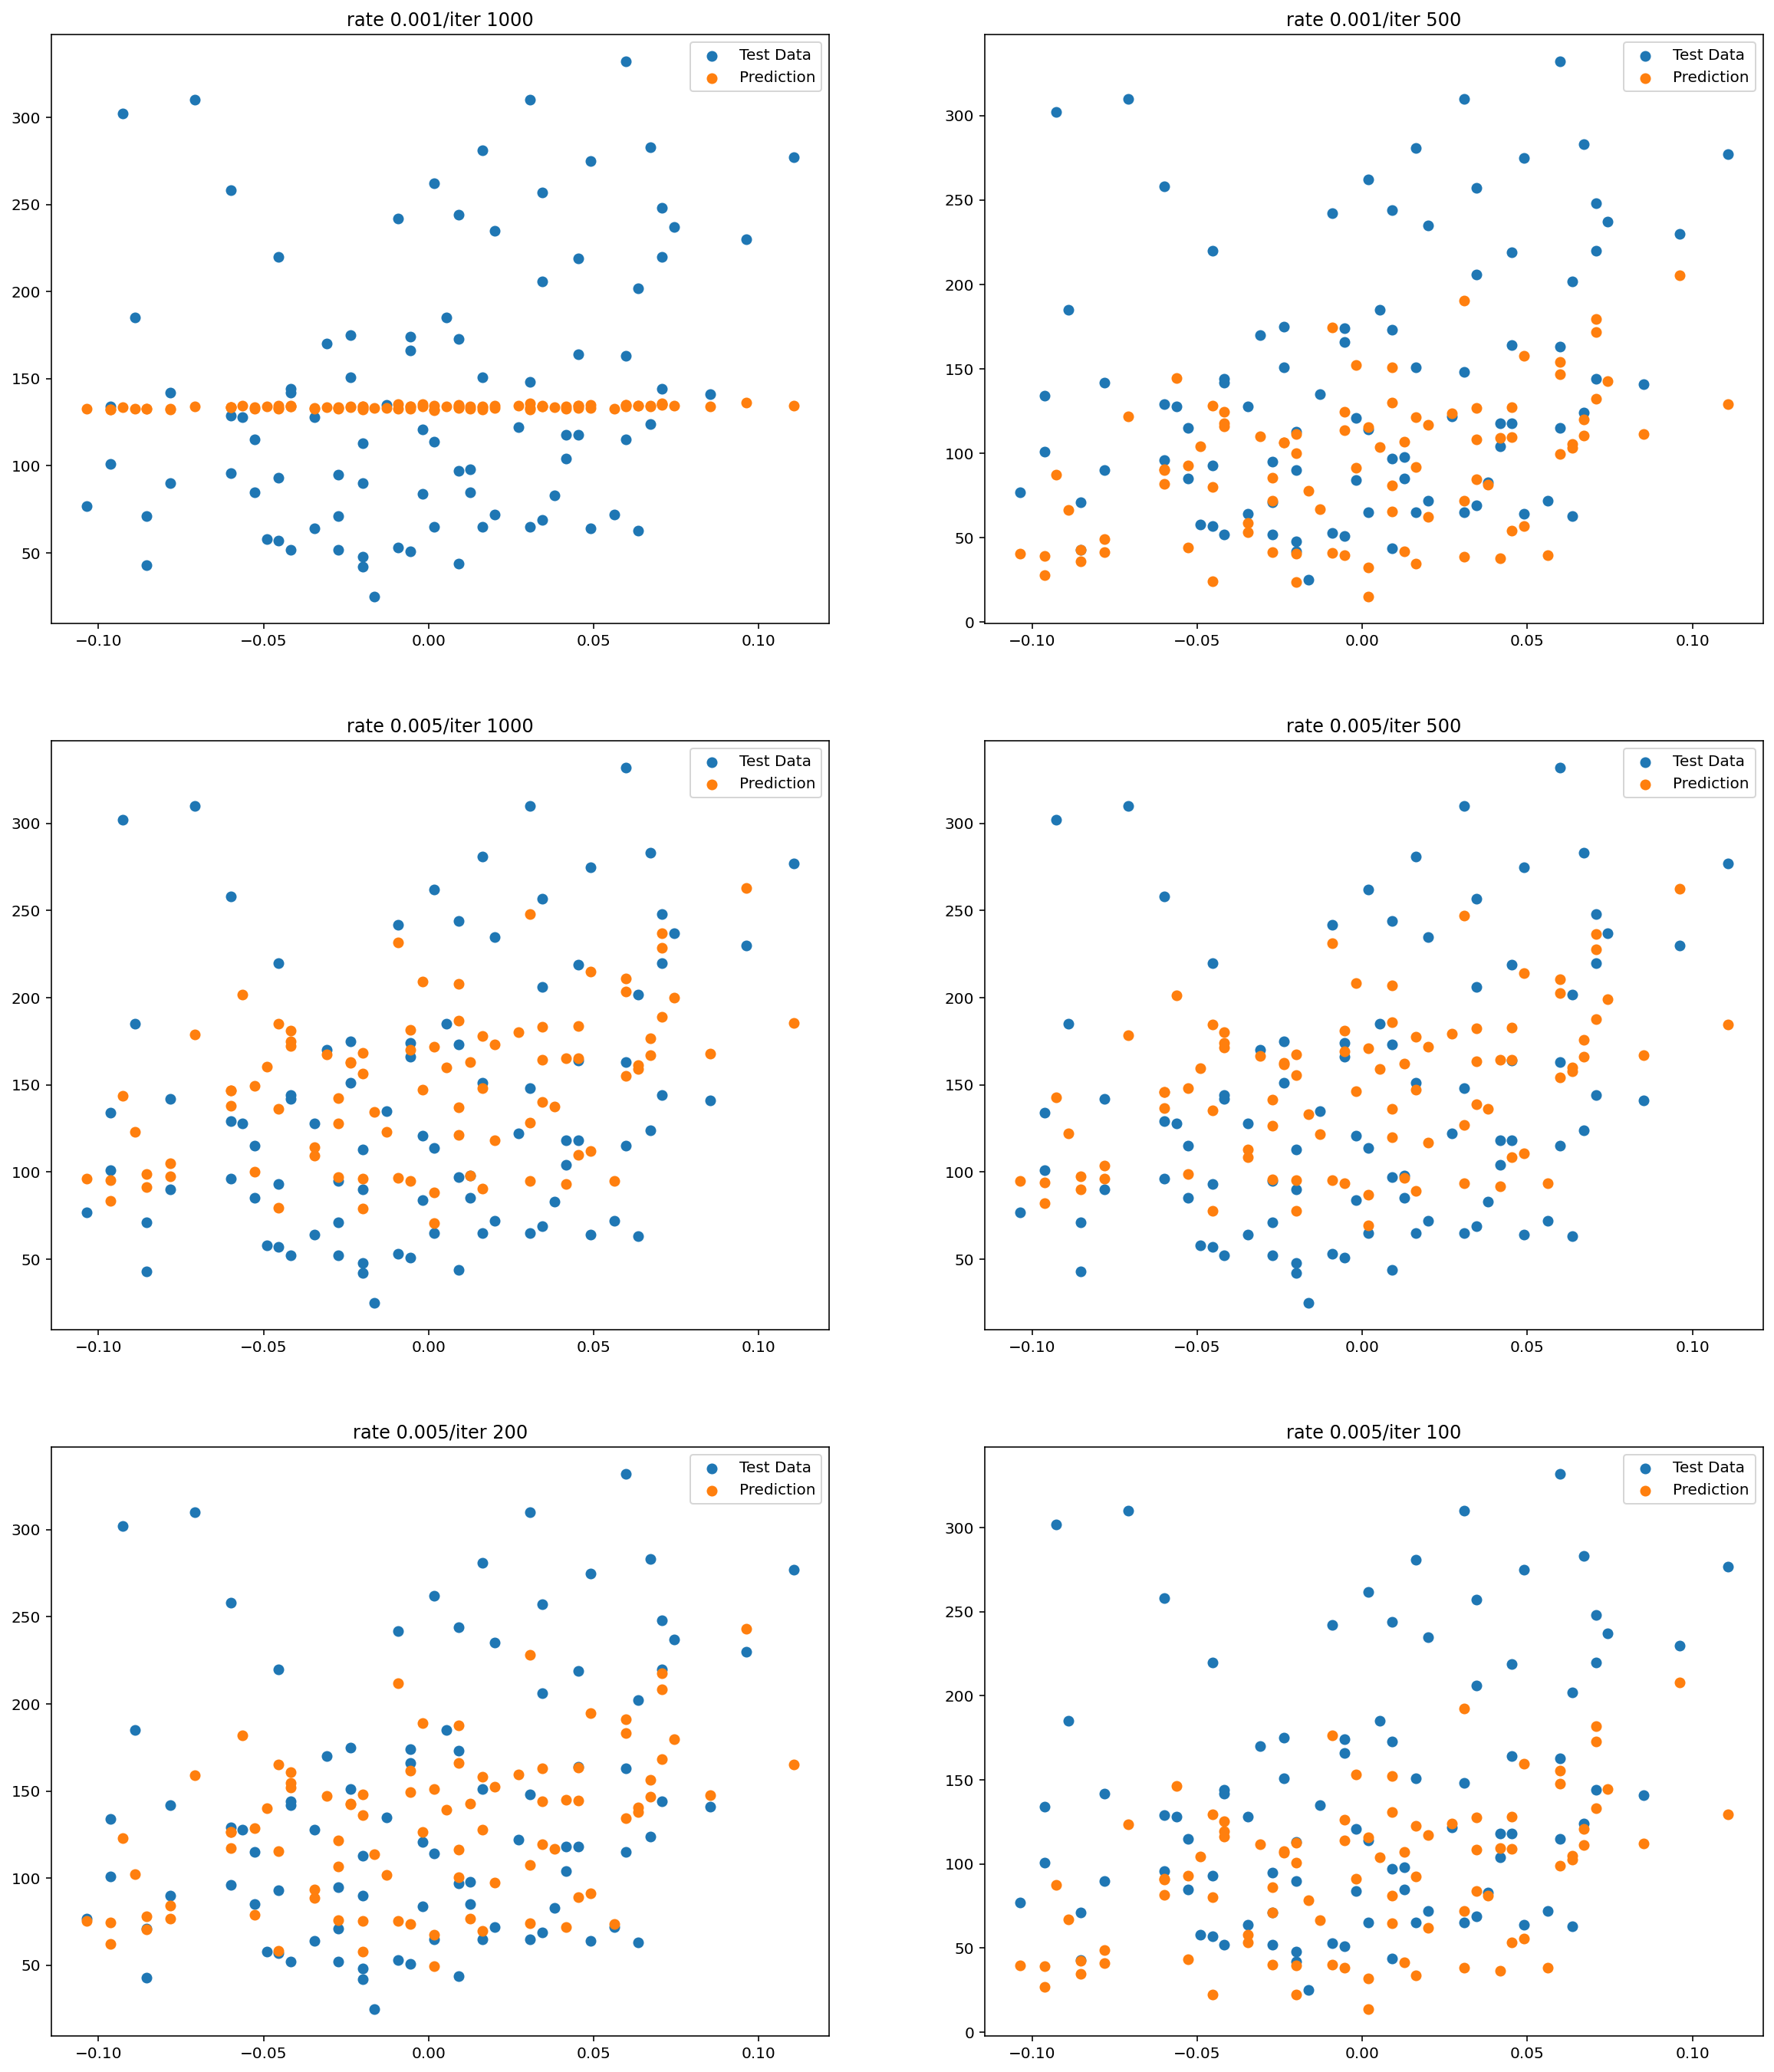

In [113]:
fig = plt.figure(figsize=(20, 24))

ax1 = fig.add_subplot(3, 2, 1)
ax1.scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
ax1.scatter(df_X_test[:, 0], prediction_001_1000, label='Prediction')
ax1.legend()
ax1.set_title("rate 0.001/iter 1000")#학습률 0.001 반복수 1000회 mse : 5926.12

ax2 = fig.add_subplot(3, 2, 2)
ax2.scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
ax2.scatter(df_X_test[:, 0], prediction_001_500, label='Prediction')
ax2.legend()
ax2.set_title("rate 0.001/iter 500")#학습률 0.001 반복수 500회 mse : 5829.50

ax3 = fig.add_subplot(3, 2, 3)
ax3.scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
ax3.scatter(df_X_test[:, 0], prediction_005_1000, label='Prediction')
ax3.legend()
ax3.set_title("rate 0.005/iter 1000")#학습률 0.005 반복수 1000회 mse : 3476.32

ax4 = fig.add_subplot(3, 2, 4)
ax4.scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
ax4.scatter(df_X_test[:, 0], prediction_005_500, label='Prediction')
ax4.legend()
ax4.set_title("rate 0.005/iter 500")#학습률 0.005 반복수 500회 mse : 3456.20

ax5 = fig.add_subplot(3, 2, 5)
ax5.scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
ax5.scatter(df_X_test[:, 0], prediction_005_200, label='Prediction')
ax5.legend()
ax5.set_title("rate 0.005/iter 200")#학습률 0.005 반복수 200회 mse : 3581.59

ax6 = fig.add_subplot(3, 2, 6)
ax6.scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
ax6.scatter(df_X_test[:, 0], prediction_005_100, label='Prediction')
ax6.legend()
ax6.set_title("rate 0.005/iter 100")#학습률 0.005 반복수 100회 mse : 5769.42

plt.show()

#배열과 반복문을 활용하면 더욱 다양한 학습률과 반복수에서 결과를 쉽게 도출할 수 있습니다.